In [1]:
%pip install wbdata
%pip install geodatasets
import geodatasets
import wbdata
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geodatasets import get_path
import numpy as np
import matplotlib.ticker as mticker

  Using cached wbdata-1.0.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached backoff-2.2.1-py3-none-any.whl.metadata (14 kB)
  Using cached dateparser-1.2.1-py3-none-any.whl.metadata (29 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.8.10-py3-none-any.whl.metadata (25 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzlocal-5.3-py3-none-any.whl.metadata (7.6 kB)
Using cached wbdata-1.0.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
Using cached dateparser-1.2.1-py3-none-any.whl (295 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzlocal-5.3-py3-none-any.whl (17 kB)
  Attempting uninstall: pytz
    Found exist

Key '8047329065704011542' not in persistent cache.
Key '3903209095268969377' not in persistent cache.
Key '-6880345493457655805' not in persistent cache.
Key '-6717014011590858535' not in persistent cache.
Key '-5295457339036792996' not in persistent cache.
Key '-121948370474971917' not in persistent cache.
Key '-1776387824488908727' not in persistent cache.
Key '902890484111204421' not in persistent cache.
Key '1066221965978001691' not in persistent cache.
Key '-6108807146721077817' not in persistent cache.
Key '-6154034620497590401' not in persistent cache.
Key '-5445968493466992099' not in persistent cache.
Key '8765749679124988659' not in persistent cache.
Key '-2017804909601636523' not in persistent cache.
Key '-2982520825717035944' not in persistent cache.
Key '7918068213638129251' not in persistent cache.
Key '6717457474105464780' not in persistent cache.
Key '3215826997430961473' not in persistent cache.
Key '-4945560179208933699' not in persistent cache.
Key '-4691322766659607

In [2]:
SOURCE = 40 
indicators = wbdata.get_indicators(source=SOURCE)
#indicators

In [3]:
variable_labels = {"SP.DYN.LE00.IN":"Total Life Expectancy"}
country_mapping = {"NZL":"New Zealand", "FJI": "Fiji", "SLB":"Solomon Islands"}
df = wbdata.get_dataframe(variable_labels, country=list(country_mapping.keys()), parse_dates=True)
df = df.reset_index()
df["ISO_A3"] = df["country"].map({v: k for k, v in country_mapping.items()})
df

,country,date,Total Life Expectancy,ISO_A3
0,Fiji,2023-01-01,NaN,FJI
1,Fiji,2022-01-01,68.312,FJI
2,Fiji,2021-01-01,67.114,FJI
3,Fiji,2020-01-01,67.924,FJI
4,Fiji,2019-01-01,67.893,FJI
...,...,...,...,...
187,Solomon Islands,1964-01-01,50.859,SLB
188,Solomon Islands,1963-01-01,50.049,SLB
189,Solomon Islands,1962-01-01,49.254,SLB
190,Solomon Islands,1961-01-01,48.434,SLB


In [4]:
countries = [c['id'] for c in wbdata.get_countries()]

In [5]:
shapefile_path = "/home/jovyan/Project 1/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

gdf = gpd.read_file(shapefile_path)

ERROR 1: PROJ: proj_create_from_database: Open of /srv/conda/share/proj failed


In [6]:
df.reset_index(inplace=True)

In [7]:
wb_countries = wbdata.get_countries()

matching_columns = [col for col in gdf.columns if "ISO" in col] 

In [8]:
merged_gdf = gdf.merge(df, on="ISO_A3", how="left")

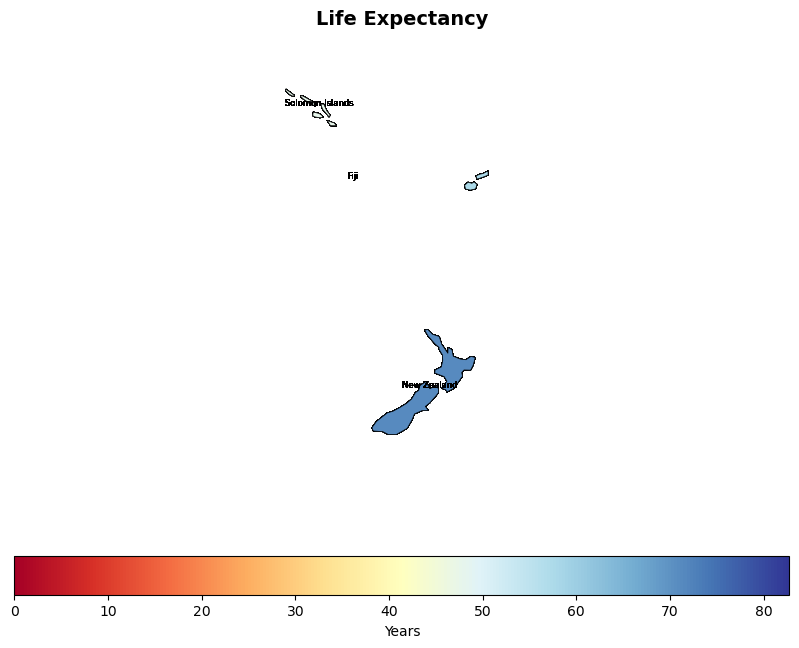

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

vmin = merged_gdf["Total Life Expectancy"].min()
vmax = merged_gdf["Total Life Expectancy"].max()
abs_max = max(abs(vmin), abs(vmax)) 
vmin, vmax = -abs_max+abs_max, abs_max

merged_gdf.plot(column="Total Life Expectancy", cmap="RdYlBu", linewidth=0.5, edgecolor="black",
                         legend=True, legend_kwds={"label": "Years", "orientation": "horizontal"}, ax=ax,
               vmin=vmin, vmax=vmax
               )

ax.set_xticks([])  
ax.set_yticks([])  
ax.set_frame_on(False) 
ax.axis("off")

ax.set_xlim([140, 200])
ax.set_ylim([-50, 0])
ax.set_title("Life Expectancy", fontsize=14, fontweight="bold")

for idx, row in merged_gdf.iterrows():
    country_name = row["SOVEREIGNT"]
    if isinstance(country_name, str) and not pd.isna(row["Total Life Expectancy"]):
        ax.annotate(
            text=country_name,
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            xytext=(3, 3),
            textcoords="offset points",
            fontsize=6,
            ha='center'
        )

cbar = ax.get_figure().axes[-1]
cbar.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.show()